In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\batch1\\Downloads\\heart_disease_dataset\\heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
x = df.drop('target',axis=1)
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)

In [8]:
print(f"{xtrain.shape} {ytrain.shape}")
print(f"{xtest.shape} {ytest.shape}")

(242, 13) (242,)
(61, 13) (61,)


In [9]:
sc = StandardScaler()
scaled_xtrain = sc.fit_transform(xtrain)
scaled_xtest = sc.transform(xtest)

In [10]:
LinRegModel = LinearRegression()
LinRegModel.fit(scaled_xtrain,ytrain)
linReg_predicts = LinRegModel.predict(scaled_xtest)

In [11]:
linReg_predicts

array([ 0.06801472,  0.71681997,  0.73679794,  0.01302379,  0.23606595,
        0.51943293,  0.1832927 ,  0.26862082, -0.18844421, -0.23819858,
        0.65236404,  0.89925409,  0.10829792,  0.76215218,  0.99402895,
        0.62248155,  0.17280607,  0.65143817, -0.14748662,  0.75662605,
        0.72253637,  0.4515309 ,  0.25067708,  0.24118341,  0.80149218,
        0.5818327 ,  0.3186585 ,  0.48354757,  1.06023388,  0.60702415,
        0.62134778, -0.05702169,  1.00480281,  0.65907569,  0.86560243,
        0.57494184,  0.07005343,  0.77550305,  0.18177813,  0.31589193,
        0.66827766,  0.73731671,  0.42602317,  0.18737756,  0.51958253,
        0.64602671,  0.75016333,  0.59514114,  0.13934865,  0.73662645,
        0.78272629,  0.56785086,  1.00228097,  0.77204668,  1.25304618,
        0.24734838,  0.93422182,  0.87746248,  0.69182111,  0.95483771,
        0.71801876])

We have used a regression model for classification, hence the output values are not discrete.

Since Predictions are continuous, we convert them into dicrete values for the accuracy score

In [12]:
bin_linreg = (linReg_predicts>=0.5).astype(int)
bin_linreg

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

Bayesian Models do not accept negative values, hence we will be using a MinMax Scaler instead of a Standard Scaler

In [13]:
mmScaler = MinMaxScaler()
mmScaled_Xtrain = mmScaler.fit_transform(xtrain)
mmScaled_Xtest = mmScaler.transform(xtest)

In [14]:
bayesModel = MultinomialNB()
bayesModel.fit(mmScaled_Xtrain,ytrain)
bayesModel_predicts = bayesModel.predict(mmScaled_Xtest)

In [15]:
bayesModel_predicts

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
dtModel = DecisionTreeClassifier()
dtModel.fit(scaled_xtrain,ytrain)
dtModel_predicts = dtModel.predict(scaled_xtest)

In [17]:
dtModel_predicts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
knnModel = KNeighborsClassifier()
knnModel.fit(scaled_xtrain,ytrain)
knnModel_predicts = knnModel.predict(scaled_xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
knnModel_predicts

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
logModel = LogisticRegression()
logModel.fit(scaled_xtrain,ytrain)
logModel_predicts = logModel.predict(scaled_xtest)

In [21]:
logModel_predicts

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
print(f"Accuracy of Linear Regression is         :{accuracy_score(bin_linreg,ytest)*100:.2f}%")
print(f"Accuracy of Naive Bayes Classifier is    :{accuracy_score(bayesModel_predicts,ytest)*100:.2f}%")
print(f"Accuracy of Decision Trees is            :{accuracy_score(dtModel_predicts,ytest)*100:.2f}%")
print(f"Accuracy of K Nearest Neighbors (K=5) is :{accuracy_score(knnModel_predicts,ytest)*100:.2f}%")
print(f"Accuracy of Logistic Regression is       :{accuracy_score(logModel_predicts,ytest)*100:.2f}%")

Accuracy of Linear Regression is         :83.61%
Accuracy of Naive Bayes Classifier is    :78.69%
Accuracy of Decision Trees is            :75.41%
Accuracy of K Nearest Neighbors (K=5) is :81.97%
Accuracy of Logistic Regression is       :85.25%


In [23]:
xPlot = [accuracy_score(bin_linreg,ytest),
                        accuracy_score(bayesModel_predicts,ytest),
                        accuracy_score(dtModel_predicts,ytest),
                        accuracy_score(knnModel_predicts,ytest),
                        accuracy_score(logModel_predicts,ytest)]
yPlot = ['Linear Regression','Naive Bayes','Decision Trees','K Nearest Neighbors','Logistic Regression']

In [24]:
sns.set_palette('Pastel1_r')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Naive Bayes'),
  Text(2, 0, 'Decision Trees'),
  Text(3, 0, 'K Nearest Neighbors'),
  Text(4, 0, 'Logistic Regression')])

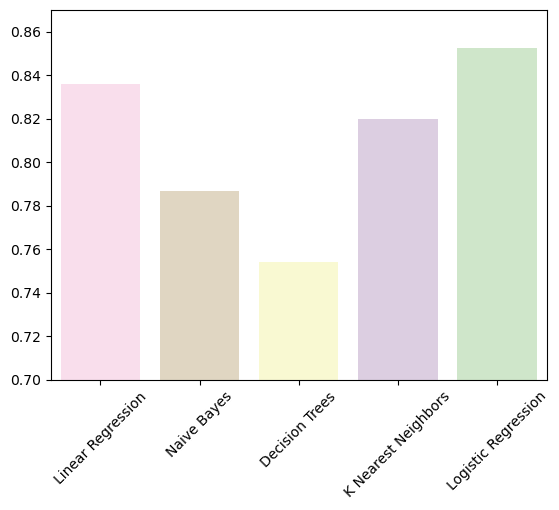

In [25]:
sns.barplot(y=xPlot,x=yPlot,)
plt.ylim(0.70,0.87)
plt.xticks(rotation=45)